## Import libraries

In [38]:
from urllib.parse import urlparse

from arcgis.gis import GIS, Item
from arcgis.features import FeatureLayerCollection
from arcgis.mapping import WebMap

## Connect to _source_ and _target_ organizations

In [39]:
source = GIS(profile="your_online_admin_profile", verify_cert=False)
target = GIS(profile="webapps_admin", verify_cert=False)

Setting `verify_cert` to False is a security risk, use at your own risk.
Setting `verify_cert` to False is a security risk, use at your own risk.


## Clone Webmap

### Get a Webmap item from _source_

<Item title:"HIFLD Hospital Locations" type:Web Map owner:admin_user>
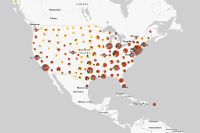

In [40]:
hifld_health_item = source.content.get("ff0361e75c484f77a4949c962201b773")
hifld_health_item

#### Initialize `WebMap` object to inspect layers

In [41]:
hifld_health_wm = WebMap(hifld_health_item)

#### Print information about `Webmap` layers

In [42]:
for wm_lyr in hifld_health_wm.layers:
    print(f"{' '*2}{wm_lyr['title']:40}{wm_lyr['itemId']}")
    print(f"{' '*4}{wm_lyr['url']}")

  hifld_hospitals                         42116f489af14736c83d087a946fbad4
    https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/hifld_hospitals/FeatureServer/0


#### Search _target_ for layer from _source_ `Webmap` 

In [43]:
for wm_layer in hifld_health_wm.layers:
    res = target.content.search(wm_layer["title"], item_type="Feature Layer")
    if bool(res):
        print(f"{wm_layer['title']} layer already exists in target organization")
    else:
        print(f"{wm_layer['title']} layer not present in target organization")

hifld_hospitals layer not present in target organization


_Target_ does not contain the layers in this `Webmap`.

### Clone Webmap

In [44]:
hifld_health_item.get_data()

{'operationalLayers': [{'id': '18e018446d5-layer-1',
   'title': 'hifld_hospitals',
   'url': 'https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/hifld_hospitals/FeatureServer/0',
   'itemId': '42116f489af14736c83d087a946fbad4',
   'layerType': 'ArcGISFeatureLayer',
   'layerDefinition': {'featureReduction': {'type': 'cluster',
     'clusterRadius': 37.5,
     'clusterMinSize': 9,
     'clusterMaxSize': 37.5,
     'disablePopup': False,
     'popupInfo': {'popupElements': [{'type': 'text',
        'text': 'This cluster represents <b>{cluster_count}</b> features.'},
       {'type': 'fields',
        'fieldInfos': [{'fieldName': 'SUM_GENERAL_ACUTE_CARE',
          'format': {'digitSeparator': True, 'places': 2},
          'isEditable': True,
          'label': 'GENERAL ACUTE CARE',
          'visible': True},
         {'fieldName': 'SUM_CRITICAL_ACCESS',
          'format': {'digitSeparator': True, 'places': 2},
          'isEditable': True,
          'label': 'CRITICAL A

In [45]:
if not target.content.folders.get("hifld_data"):
    target.content.folders.create("hifld_data")
wm_clone = target.content.clone_items(items=[hifld_health_item],
                                      folder="hifld_data")
wm_clone

[<Item title:"hifld_hospitals" type:Feature Layer Collection owner:webapps_admin>,
 <Item title:"HIFLD Hospital Locations" type:Web Map owner:webapps_admin>]

#### Get `Webmap item` from resulting list

<Item title:"HIFLD Hospital Locations" type:Web Map owner:webapps_admin>
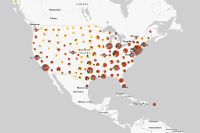

In [46]:
target_hifld_item = wm_clone[1]
target_hifld_item

#### Initialize `Webmap` object to inspect layers

In [47]:
target_hifld_wm = WebMap(target_hifld_item)

#### Print information about `Webmap` layers

In [48]:
for hifld_map_lyr in target_hifld_wm.layers:
    print(f"{' '*2}{hifld_map_lyr['title']:40}{hifld_map_lyr['itemId']}")
    print(f"{' '*4}{hifld_map_lyr['url']}")

  hifld_hospitals                         204aa603148a4ab8ba9f4b7e2a61dd12
    https://services5.arcgis.com/cuQhNeNcUrgLmYGD/arcgis/rest/services/hifld_hospitals/FeatureServer/0


In [49]:
target_hifld_item.get_data()

{'operationalLayers': [{'id': '18e018446d5-layer-1',
   'title': 'hifld_hospitals',
   'url': 'https://services5.arcgis.com/cuQhNeNcUrgLmYGD/arcgis/rest/services/hifld_hospitals/FeatureServer/0',
   'itemId': '204aa603148a4ab8ba9f4b7e2a61dd12',
   'layerType': 'ArcGISFeatureLayer',
   'layerDefinition': {'featureReduction': {'type': 'cluster',
     'clusterRadius': 37.5,
     'clusterMinSize': 9,
     'clusterMaxSize': 37.5,
     'disablePopup': False,
     'popupInfo': {'popupElements': [{'type': 'text',
        'text': 'This cluster represents <b>{cluster_count}</b> features.'},
       {'type': 'fields',
        'fieldInfos': [{'fieldName': 'SUM_GENERAL_ACUTE_CARE',
          'format': {'digitSeparator': True, 'places': 2},
          'isEditable': True,
          'label': 'GENERAL ACUTE CARE',
          'visible': True},
         {'fieldName': 'SUM_CRITICAL_ACCESS',
          'format': {'digitSeparator': True, 'places': 2},
          'isEditable': True,
          'label': 'CRITICAL A

#### Search the _target_ again for the layer from the _source_ `Webmap`

In [50]:
for hifld_lyr in target_hifld_wm.layers:
    res = target.content.search(hifld_lyr["title"], item_type="Feature Layer")
    if bool(res):
        print(f"{hifld_lyr['title']} layer now exists in target organization")
    else:
        print(f"{hifld_lyr['title']} layer not present in target organization")

hifld_hospitals layer now exists in target organization


_Target_ now contains the layers cloned along with the `Webmap`